In [ ]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.ibmq import*
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

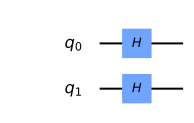

In [2]:
n = 2
grover = QuantumCircuit(n)

for qubit in range(n):
    grover.h(qubit)
grover.draw('mpl')

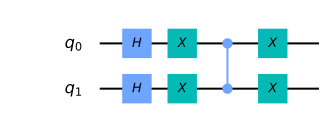

In [3]:
# apply oracle |w> = |00> 
# manipulate the probabilty of superposition
# marking the state |00> with reflections 
# manipulating probability.
for qubit in range(n):
    grover.x(qubit)

grover.cz(0, 1)

for qubit in range(n):
    grover.x(qubit)

grover.draw('mpl')


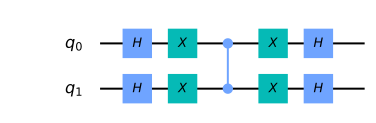

In [4]:
#Hadamard operations
for qubit in range(n):
    grover.h(qubit)
grover.draw('mpl')

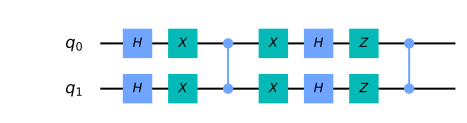

In [5]:
# U reflections
for qubit in range(n):
    grover.z(qubit)
grover.cz(0,1)

grover.draw('mpl')

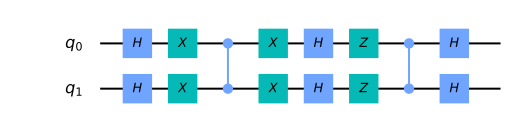

In [6]:
#hadamard on last two qubits
for qubit in range(n):
    grover.h(qubit)

grover.draw('mpl')

In [7]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover,backend_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec,pretext='|\\psi\\range =')

<IPython.core.display.Math object>

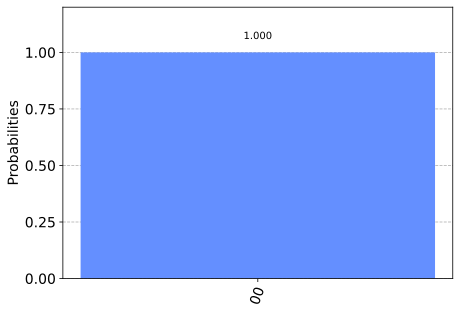

In [8]:
grover.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)


In [9]:
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_ourense


In [10]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(grover, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)


Job Status: job has successfully run


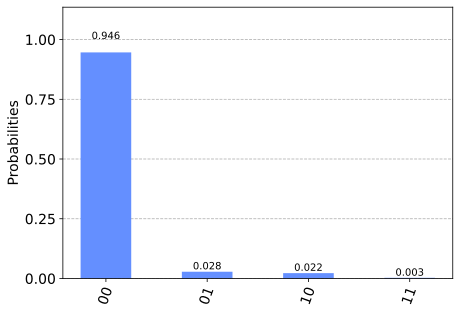

In [11]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover)
plot_histogram(answer)
